In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/K04c_Kupffer_c57_obob_leptin_comparison_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/leptin_6h/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# make folder for figures
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')
    
# make folder for gene lists
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')
    
if not os.path.isdir('./promoter_motif_finding'):
    os.mkdir('./promoter_motif_finding')

# Check qc stats

In [3]:
qc = ngs_qc(dataDirectory)

/home/h1bennet/strains/data/RNA/leptin_6h//
./leptin_6h_qc/


/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsm

<Figure size 432x288 with 0 Axes>

In [5]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
tag_mouse_obhet_M_F480HighKupffer_RNA_polyA_veh_6h_rep1_HBENN_l20210414_CAACAATG_CTTCACGG.mm10.star.sam,4606609.0,75.0,0.008641,5.104,2.720986e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obhet_M_F480HighKupffer_RNA_polyA_veh_6h_rep2_HBENN_l20210414_TGGTGGCA_TCCTGTAA.mm10.star.sam,3100722.0,75.0,0.006811,5.976,2.720557e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480HighKupffer_RNA_polyA_leptin_6h_rep1_HBENN_l20210414_AACAGGTT_ATACCAAG.mm10.star.sam,3188461.0,75.0,0.007423,6.335,2.720920e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480HighKupffer_RNA_polyA_leptin_6h_rep2_HBENN_l20210414_GGTGAACC_GCGTTGGA.mm10.star.sam,2529595.0,75.0,0.006139,6.605,2.721447e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480HighKupffer_RNA_polyA_veh_6h_rep1_HBENN_l20210414_ATATCTCG_ATCTTAGT.mm10.star.sam,3012411.0,75.0,0.006769,6.113,2.720384e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480HighKupffer_RNA_polyA_veh_6h_rep2_HBENN_l20210414_GCGCTCTA_GCTCCGAC.mm10.star.sam,2503800.0,75.0,0.007223,7.850,2.720904e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480HighKupffer_RNA_polyA_veh_6h_rep3_HBENN_l20210414_AGGCAGAG_AGAATGCC.mm10.star.sam,2335797.0,75.0,0.005841,6.805,2.721146e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480IntKupffer_RNA_polyA_leptin_6h_rep3_HBENN_l20210414_ACCTTGGC_GGCCTCAT.mm10.star.sam,3849864.0,75.0,0.006848,4.840,2.720721e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480IntKupffer_RNA_polyA_veh_6h_rep1_HBENN_l20210414_ATGGCATG_AAGGTACC.mm10.star.sam,7153230.0,75.0,0.006769,2.575,2.721547e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tag_mouse_obob_M_F480IntKupffer_RNA_polyA_veh_6h_rep2_HBENN_l20210414_GCAATGCA_GGAACGTT.mm10.star.sam,2315166.0,75.0,0.006252,7.348,2.721181e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [7]:
ids =  ['c57bl6j_kupffer',
        'obob_f480high_veh',
        'obob_f480high_leptin']

In [8]:
c57bl6j_kupffer = ['/home/h1bennet/strains/data/RNA/control_kupffer/C57B6J_Tim4PosKupffer_RNA_C5701C_HBENN_l20201208_TCGTAGTG_AGACTTGG',
                   '/home/h1bennet/strains/data/RNA/control_kupffer/C57B6J_Tim4PosKupffer_RNA_C5701D_HBENN_l20201208_CTACGACA_GAGTCCAA']

obob_f480high_veh = [dataDirectory+'tag_mouse_obob_M_F480HighKupffer_RNA_polyA_veh_6h_rep1_HBENN_l20210414_ATATCTCG_ATCTTAGT.mm10.star.sam',
                     dataDirectory+'tag_mouse_obob_M_F480HighKupffer_RNA_polyA_veh_6h_rep2_HBENN_l20210414_GCGCTCTA_GCTCCGAC.mm10.star.sam',
                     dataDirectory+'tag_mouse_obob_M_F480HighKupffer_RNA_polyA_veh_6h_rep3_HBENN_l20210414_AGGCAGAG_AGAATGCC.mm10.star.sam']

obob_f480high_leptin = [dataDirectory+'tag_mouse_obob_M_F480HighKupffer_RNA_polyA_leptin_6h_rep1_HBENN_l20210414_AACAGGTT_ATACCAAG.mm10.star.sam',
                        dataDirectory+'tag_mouse_obob_M_F480HighKupffer_RNA_polyA_leptin_6h_rep2_HBENN_l20210414_GGTGAACC_GCGTTGGA.mm10.star.sam']


In [9]:
c57bl6j_kupffer_ids = [i.split('/')[-1].split('_')[3] for i in c57bl6j_kupffer]
obob_f480high_veh_ids = [i.split('/')[-1].split('_')[9] for i in obob_f480high_veh]
obob_f480high_leptin_ids = [i.split('/')[-1].split('_')[9] for i in obob_f480high_leptin]

In [10]:
colors = ['#bdbdbd',
          '#fc9272',
          '#de2d26']
paths = [';'.join(c57bl6j_kupffer),
         ';'.join(obob_f480high_veh),
         ';'.join(obob_f480high_leptin)]

short_ids = [';'.join(c57bl6j_kupffer_ids),
             ';'.join(obob_f480high_veh_ids),
             ';'.join(obob_f480high_leptin_ids)]

In [11]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    alignStats.R ./sampleDef.txt > qcStats.txt
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

# Collect genes for writing to metascape

We will also save repeat ids for motif finding

In [78]:
log2fc = 1
padj = 0.05
gene_list_dict = {}
id_list_dict = {}

with o'young's pipeline the first member of the comparison is the denominator (negative log2fc is 'up' in first relative to second)

In [79]:
for i in glob.glob('./differential/*homer.txt'):
    print(i)
    groups = [i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[0],
              i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[1]]
    print('Group 0: '+groups[0])
    print('Group 1: '+groups[1])
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath='./expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes_g0 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
    sig_genes_g1 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] >= log2fc)].to_list()
    sig_id_g0 = df.RepeatID[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
    sig_id_g1 = df.RepeatID[(df['padj'] < padj) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[0])] = sig_genes_g0
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[1])] = sig_genes_g1
    id_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[0])] = sig_genes_g0
    id_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[1])] = sig_genes_g1

./differential/c57bl6j_kupffer.vs.obob_f480high_leptin.scatter.homer.txt
Group 0: c57bl6j_kupffer
Group 1: obob_f480high_leptin
ge all transcripts (24940, 14)
Diff Gene selected transcripts (7737, 14)
ge selected transcripts (7737, 14)
./differential/c57bl6j_kupffer.vs.obob_f480high_veh.scatter.homer.txt
Group 0: c57bl6j_kupffer
Group 1: obob_f480high_veh
ge all transcripts (24940, 14)
Diff Gene selected transcripts (7925, 14)
ge selected transcripts (7925, 14)
./differential/obob_f480high_veh.vs.obob_f480high_leptin.scatter.homer.txt
Group 0: obob_f480high_veh
Group 1: obob_f480high_leptin
ge all transcripts (24940, 14)
Diff Gene selected transcripts (8046, 14)
ge selected transcripts (8046, 14)
./differential/obob_f480high_leptin.vs.c57bl6j_kupffer.scatter.homer.txt
Group 0: obob_f480high_leptin
Group 1: c57bl6j_kupffer
ge all transcripts (24940, 14)
Diff Gene selected transcripts (7737, 14)
ge selected transcripts (7737, 14)
./differential/obob_f480high_veh.vs.c57bl6j_kupffer.scatte

# We are interested in whether leptin treatment brings kupffer cells closer to "c57" - aka restores their phenotype.
Can do this by looking at expression of DE genes between obob/c57bl6j and then also look at leptin treated expression?

In [80]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

In [81]:
genes = gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_veh_up_obob_f480high_veh'] + \
gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_veh_up_c57bl6j_kupffer']

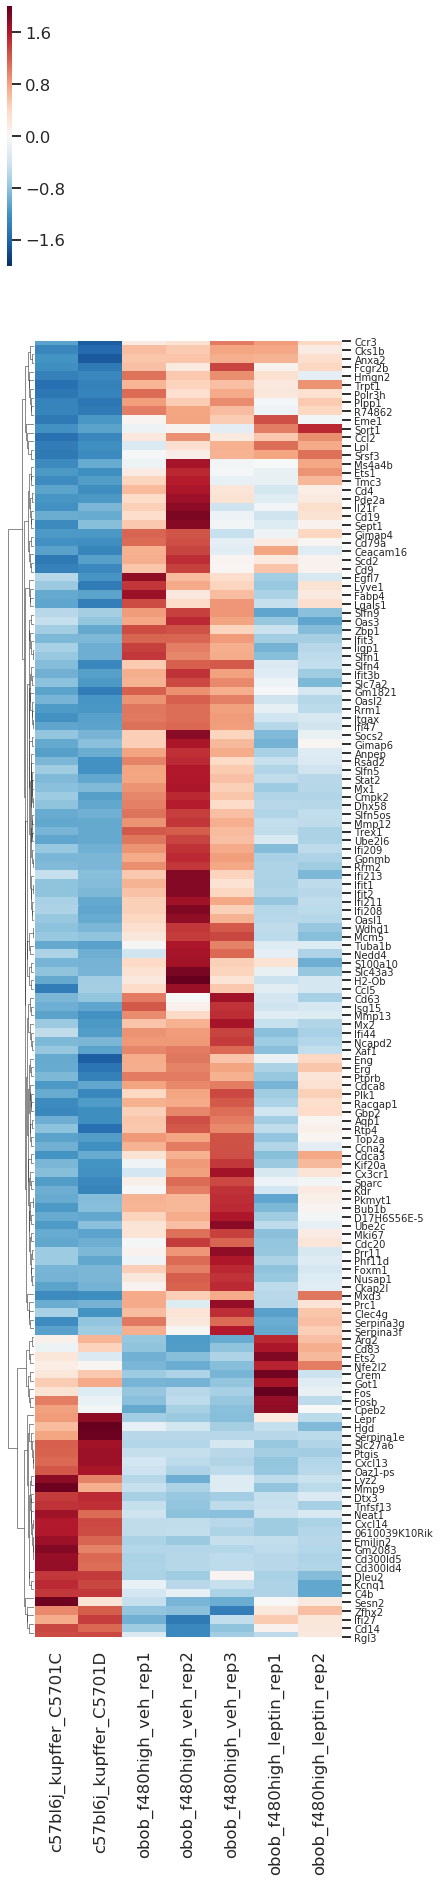

In [98]:
hm = sns.clustermap(
    tpm_mat.loc[genes, :],
    z_score=0,
    col_cluster=False,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    yticklabels=1,
    figsize=(6,30))

hm.ax_heatmap.set_yticklabels(hm.ax_heatmap.get_ymajorticklabels(), fontsize = 10);

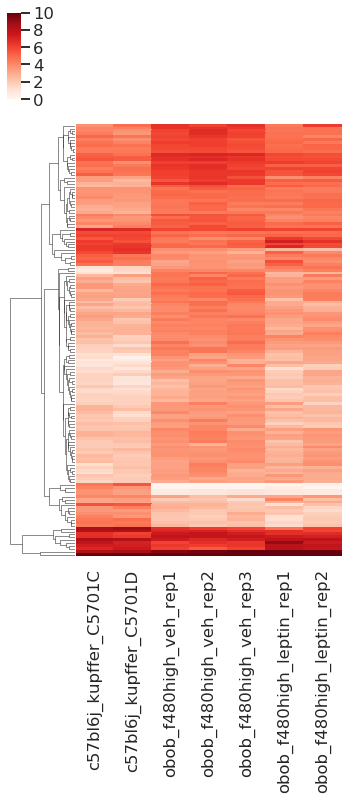

In [73]:
hm = sns.clustermap(
    np.log2(tpm_mat.loc[genes, :]+1),
    # z_score=0,
    cmap='Reds',
    # vmin=-2,
    vmax=10,
    col_cluster=False,
    yticklabels=0,
    figsize=(6,10))

### Clearly there are genes that are no longer differential, lets try and come up with a systematic way of finding them.

Reextract the gene list dict

In [104]:
log2fc = 1
padj = 0.05
gene_list_dict = {}
id_list_dict = {}

for i in glob.glob('./differential/*homer.txt'):
    # print(i)
    groups = [i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[0],
              i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[1]]
    # print('Group 0: '+groups[0])
    # print('Group 1: '+groups[1])
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath='./expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes_g0 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
    sig_genes_g1 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[0])] = sig_genes_g0
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[1])] = sig_genes_g1

ge all transcripts (24940, 14)
Diff Gene selected transcripts (7737, 14)
ge selected transcripts (7737, 14)
ge all transcripts (24940, 14)
Diff Gene selected transcripts (7925, 14)
ge selected transcripts (7925, 14)
ge all transcripts (24940, 14)
Diff Gene selected transcripts (8046, 14)
ge selected transcripts (8046, 14)
ge all transcripts (24940, 14)
Diff Gene selected transcripts (7737, 14)
ge selected transcripts (7737, 14)
ge all transcripts (24940, 14)
Diff Gene selected transcripts (7925, 14)
ge selected transcripts (7925, 14)
ge all transcripts (24940, 14)
Diff Gene selected transcripts (8046, 14)
ge selected transcripts (8046, 14)


In [106]:
temp_list = set(gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_veh_up_obob_f480high_veh']).difference(
                gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_leptin_up_obob_f480high_leptin'])

# Single gene plots

In [16]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

#### Aside - make a tpm plot for chris

In [17]:
# chris_tpm = pd.read_csv('./AJ Balb C57 Healthy NASH CCL4.csv', index_col=0)

# chris_tpm_new = chris_tpm.merge(tpm_mat.iloc[:, 2:],
#                                 left_index=True,
#                                 right_index=True,
#                                 how='left')

# chris_tpm_new.to_csv('./AJ Balb C57 Healthy NASH CCL4 obob leptin.csv')

In [53]:
groups = [[0,1],
          [2,3],
          [4,5,6],
          [7,8],
          [9,10,11],
          [12]]

group_labels = ['c57bl6j_kupffer',
                'het_f480high_veh',
                'obob_f480high_veh',
                'obob_f480high_leptin',
                'obob_f480int_veh',
                'obob_f480int_leptin']

colors = ['#bdbdbd',
          '#636363',
          '#fc9272',
          '#de2d26',
          '#fdae6b',
          '#e6550d']

# make legend
legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

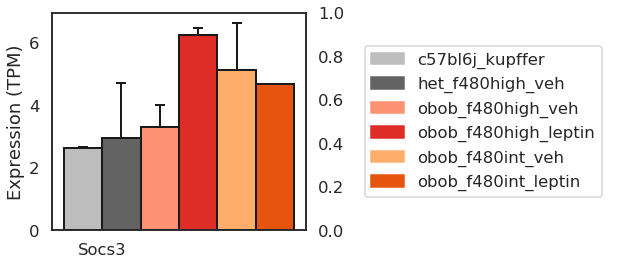

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

gene_list_bar_plot(['Socs3'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center');
axs[1].spines['top'].set_visible(False);
axs[1].spines['right'].set_visible(False);
axs[1].spines['left'].set_visible(False);
axs[1].spines['bottom'].set_visible(False);
axs[1].set_xticklabels('');

Plot with F480Hi only

In [69]:
groups = [[0,1],
          [2,3],
          [4,5,6],
          [7,8]]

group_labels = ['c57bl6j_kupffer',
                'het_f480high_veh',
                'obob_f480high_veh',
                'obob_f480high_leptin']

colors = ['#bdbdbd',
          '#636363',
          '#fc9272',
          '#de2d26']

# make legend
legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

In [67]:
tpm_mat.index[tpm_mat.index.str.contains('Ifi')]

Index(['Ifi35', 'Ifi209', 'Ifi211', 'Ifi30', 'Ifitm3', 'Ifi27', 'Ifit1',
       'Ifi207', 'Ifit3', 'Ifit2', 'Ifi208', 'Ifit3b', 'Ifi47', 'Ifitm2',
       'Ifi203', 'Ifitm6', 'Ifi205', 'Ifi44', 'Ifih1', 'Ifi27l2a', 'Ifitm10',
       'Ifitm1', 'Ifi204', 'Ifi213'],
      dtype='object', name='gene')

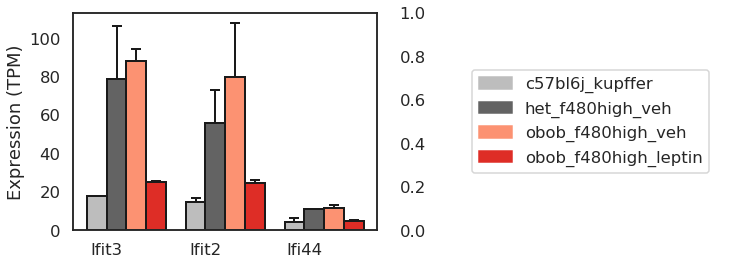

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

gene_list_bar_plot(['Ifit3', 'Ifit2', 'Ifi44'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width = 0.2,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center');
axs[1].spines['top'].set_visible(False);
axs[1].spines['right'].set_visible(False);
axs[1].spines['left'].set_visible(False);
axs[1].spines['bottom'].set_visible(False);
axs[1].set_xticklabels('');

# Look at motif enrichment at promoters of differential genes.

In [22]:
if not os.path.isdir('./promoter_motif_finding'):
    os.mkdir('./promoter_motif_finding')

Test out motif finding

    findMotifs.pl \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_1_pval_0.05.txt mouse \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_1_pval_0.05_motifs/ -len 8,10,12
    
        findMotifs.pl \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_0_pval_0.05.txt mouse \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_0_pval_0.05_motifs/ -len 8,10,12
    
        findMotifs.pl \
        ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_1_pval_0.05.txt mouse \
        ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_1_pval_0.05_motifs/ -len 8,10,12
    
        findMotifs.pl ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_0_pval_0.05.txt mouse ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_0_pval_0.05_motifs/ -len 8,10,12

Read in known motif results

In [29]:
known_motif_pval_dict = {}
for f in np.sort(glob.glob('./promoter_motif_finding/*/knownResults.txt')):
    # read in signifance values using pandas
    frame = pd.read_csv(f, sep='\t', index_col=0)
    
    # remove duplicates
    frame = frame[~frame.index.duplicated(keep='first')]
    pval = frame.iloc[:, 2]
    
    # extract name of sample
    sample = f.split('/')[2]
    
    # store in dict
    known_motif_pval_dict[sample] = pval    
    
# create data frame
known_motif_pval_frame = pd.DataFrame(known_motif_pval_dict)

# sort by average p value
known_motif_pval_frame = known_motif_pval_frame.reindex(known_motif_pval_frame.mean(axis=1).sort_values().index.tolist())

known_motif_pval_frame.to_csv('./homer_known_motifs_distal_log.txt', sep='\t')

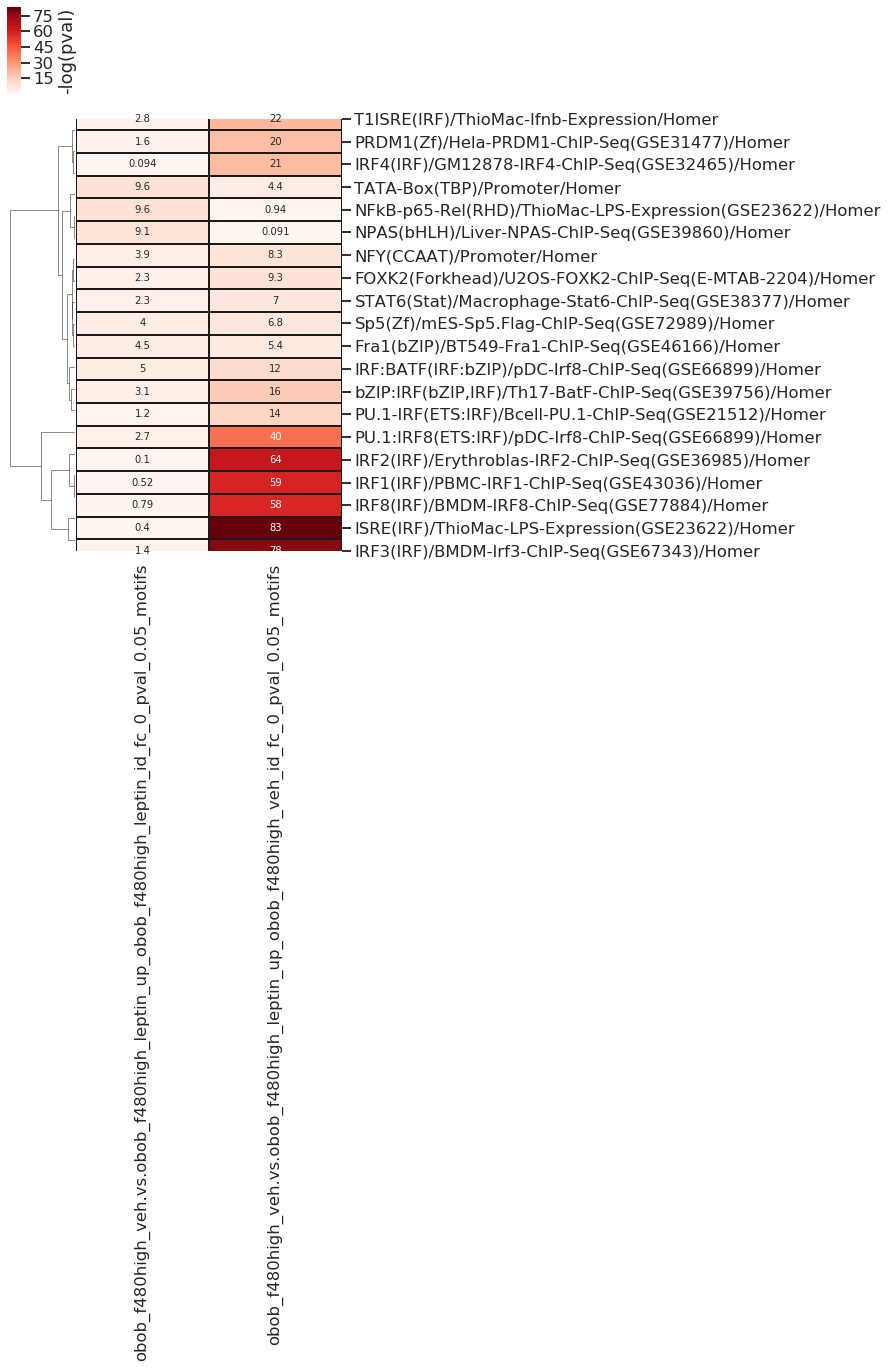

In [39]:
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('fc_0_')]

# sort by new mean
tmp_frame = tmp_frame.reindex(tmp_frame.mean(axis=1).sort_values(ascending=True).index.tolist())

sns.clustermap(
    -tmp_frame.loc[(tmp_frame <=-5).any(axis=1), :].head(20),
    cmap='Reds',
    linewidths=1,
    linecolor='k',
    annot=True,
    col_cluster=False,
    cbar_kws={'label': '-log(pval)'},
    figsize=(6,10))

# Look at overlap with strain specific genes.

In [59]:
# make dict to hold lists
strain_spec_lists = {}
# read in lists of strain specific genes
for i in glob.glob('/home/h1bennet/strains_rna/results/K00_Strains_Control_Kupffer_RNA/gene_lists/*txt'):
    with open(i, 'r') as f:
        listname = i.split('/')[-1].split('_kupffer')[0]
        genelist = [i.strip() for i in f.readlines()[1:]]
        strain_spec_lists[listname] = genelist

In [60]:
from matplotlib_venn import venn2

In [76]:
set(strain_spec_lists['aj_union']).intersection(
    set(['Ifi35', 'Ifi209', 'Ifi211', 'Ifi30', 'Ifitm3', 'Ifi27', 'Ifit1',
       'Ifi207', 'Ifit3', 'Ifit2', 'Ifi208', 'Ifit3b', 'Ifi47', 'Ifitm2',
       'Ifi203', 'Ifitm6', 'Ifi205', 'Ifi44', 'Ifih1', 'Ifi27l2a', 'Ifitm10',
       'Ifitm1', 'Ifi204', 'Ifi213']))

{'Ifi44', 'Ifi47', 'Ifitm10'}

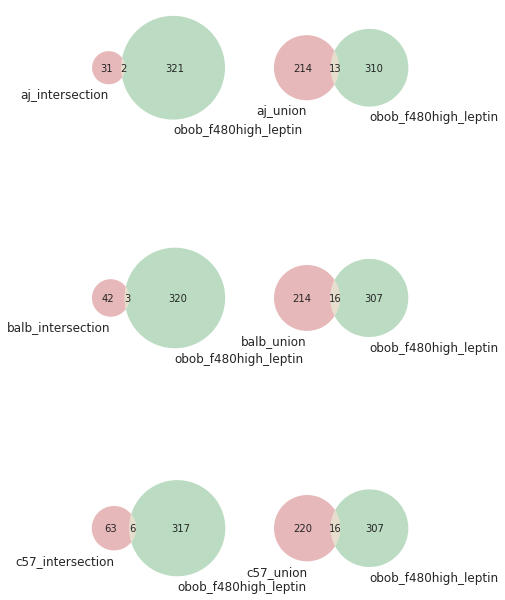

In [65]:
lep_list = 'obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin'

fig, axs = plt.subplots(3, 2, figsize=(6,12))

for i, ax in zip(np.sort(list(strain_spec_lists.keys())), axs.flat):
    venn2([set(strain_spec_lists[i]),
          set(gene_list_dict[lep_list])],
          set_labels=(i, lep_list.split('_up_')[-1]),
          ax=ax)

# Plot potential nichenet ligands

In [16]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']